



# Support Vector Regression

## Importing the content of the drive

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [33]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/support _vector_regression/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [34]:
  # reshaping the dependent variable data into matrix 
  y = y.reshape(len(y),1)

In [35]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling


In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [37]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [38]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training Support Vector Regression Model 

In [39]:
from sklearn.svm import SVR

# there are variety of kernel based on the requirement
# Gaussian Radial Basis function
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting the Result 

In [40]:
# Scaling bring us a problem when predicting the result. 
# Because we want the result based on unscaled value . 
# For example we want the person's salary on level 6.5. 
# But our model has been trained on values which have been scaled in the limit -3 , 3
# To solve this problem there are various methods provided 


# Steps 
# Transform 6.5 into 2d array -> [[6.5]]
# Feature scale it using sc_X -> sc_X.transform([[6.5]])
# Predict the corresponding y value -> regressor.predict(sc_X.transform([[6.5]]))
# Provide the value to inverse transform to know the salary -> sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))))

[170370.0204065]


## Visualising the result

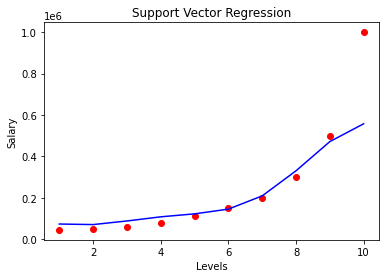

In [41]:
# -- Scatter is used for the Points

plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')

# -- Plot is used for the line
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color='blue')


plt.title('Support Vector Regression')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

## Visualizing the result (Higher Resolution)

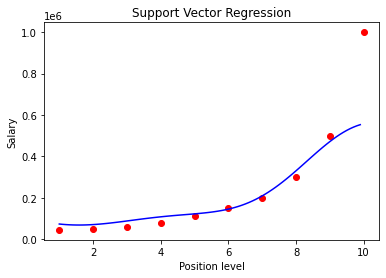

In [49]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()